<a href="https://colab.research.google.com/github/HIJADI/Data-Science-Portfolio/blob/main/project2_numerical_ordinal_nominal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Housing Price Prediction

## Problem Definition


This project is about building a model for predicting house sellig prices given a number of numerical and categorical input variables, such as basement square footage, number of bathrooms, foundation type, etc.


The given sale prices are taken as a continous target variable, and supervised Linear Regression models are fit on the input variables techniques with feature scaling and regularization.


The goal for this project is to minimize the RMS percentage error ( root mean squared percentage error - RMSPE ) on prediction of the house sales price.

## Import needed packages

In [207]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


## Data Sources


### EDA

In [208]:
# check data file access and size
!curl -I https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv


HTTP/1.1 200 OK
x-amz-id-2: ppcc0VhMUr7d2IckuufHVwuAiB2e/FjrJlcVodyPC/VT8OovTT3vLSzOTHEmwoiqjn4PexqpIHw=
x-amz-request-id: 7ESNV7FB8F2RKVSC
Date: Wed, 15 Oct 2025 21:46:28 GMT
Last-Modified: Fri, 06 Oct 2023 04:00:27 GMT
ETag: "76e84c9ee7f6fd4d51276697f81e76e1"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 880420
Server: AmazonS3



In [209]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.2-Housing/Data/Housing.Data.csv"
houses = pd.read_csv(url)
houses.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,905101070,20,RL,62.0,14299,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2007,WD,Normal,115400
1,905101330,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
2,903454090,50,RM,50.0,9000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,141000
3,533244030,60,FV,68.0,7379,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,254000
4,909252020,70,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2009,WD,Normal,155000


In [210]:
houses.shape


(2637, 81)

## Data Cleaning


### IDE
*   SalePrice is the precition target and it has values in all the 2637 values
*   37 numeric features (11 float64, 26 int64)
*   43 non-numeric features



In [211]:
houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2637 non-null   int64  
 1   MS SubClass      2637 non-null   int64  
 2   MS Zoning        2637 non-null   object 
 3   Lot Frontage     2188 non-null   float64
 4   Lot Area         2637 non-null   int64  
 5   Street           2637 non-null   object 
 6   Alley            180 non-null    object 
 7   Lot Shape        2637 non-null   object 
 8   Land Contour     2637 non-null   object 
 9   Utilities        2637 non-null   object 
 10  Lot Config       2637 non-null   object 
 11  Land Slope       2637 non-null   object 
 12  Neighborhood     2637 non-null   object 
 13  Condition 1      2637 non-null   object 
 14  Condition 2      2637 non-null   object 
 15  Bldg Type        2637 non-null   object 
 16  House Style      2637 non-null   object 
 17  Overall Qual  

In [212]:
houses.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
PID,2637.0,7.141301e+08,1.887527e+08,526301100.0,5.284770e+08,535453040.0,9.071870e+08,1.007100e+09
MS SubClass,2637.0,5.734926e+01,4.249909e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2188.0,6.916682e+01,2.335678e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2637.0,1.004469e+04,6.742550e+03,1300.0,7.436000e+03,9450.0,1.152600e+04,1.646600e+05
Overall Qual,2637.0,6.097459e+00,1.411522e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2637.0,5.569966e+00,1.118262e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2637.0,1.971289e+03,3.030699e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2637.0,1.984203e+03,2.091308e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2614.0,1.018879e+02,1.795782e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2636.0,4.384412e+02,4.496023e+02,0.0,0.000000e+00,368.0,7.320000e+02,5.644000e+03


### PID's are unique per row, so drop its column

In [213]:
print(f"Rows per PID: {houses['PID'].value_counts().unique()}")
houses_orig = houses.copy()
houses.drop("PID", axis=1, inplace=True)


Rows per PID: [1]


In [214]:
houses.describe().transpose().shape


(37, 8)

In [215]:
houses.shape


(2637, 80)

### Histogram of variables

In [216]:
# Create subplots
fig = make_subplots(
    rows=10, cols=8,
    subplot_titles=houses.columns,
    #vertical_spacing=0.1,
    #horizontal_spacing=0.1,
    #column_widths=[0.7, 0.3],  # Left column is wider
    #row_heights=[1]*20, #, 0.4]     # Top row is taller
)

for i, v in enumerate(houses.columns):
  r, c = (i//8 + 1, i%8 + 1)
  # Add histogram for Variable A
  #print(r if r==1 else ridx[r-1], c)
  fig.add_trace(
      go.Histogram(x=houses[v], name=v),
      row=r, col=c,
      # row=r if r==1 else r*2-1, col=c)
  )

fig.update_layout(
    title_text="Histograms of All Variables",
    autosize=True,  # Set to False to enable manual width/height control
    width=800,
    height=1600,
    font=dict(size=8,),
    title_font=dict(size=16,), #family="Impact", color="teal")
    #margin=dict(l=50, r=50, t=50, b=50), # Adjust margins as needed
    #paper_bgcolor="LightSteelBlue", # Example of other layout settings
)
fig.update_annotations(font_size=8)
# fig.update_traces(
#     textfont=dict(family="monospace", size=8, color="white")
# )
fig.show()


## Exploratory Data Analysis


### Separate numerical and categorical columns

In [217]:
houses_numerical = houses.select_dtypes(exclude=["object"]).copy()
houses_categorical = houses.select_dtypes(include=["object"]).copy()


In [218]:
ordinal_cols = [
    'Exter Qual',
    'Exter Cond',
    'Bsmt Qual',
    'Heating QC',
    'Kitchen Qual',
    'Fireplace Qu',
    'Garage Finish',
    'Garage Qual',
    'Garage Cond',
    'Pool QC',
]

nominal_cols = [
    'MS Zoning',
    'Street',
    'Alley',
    'Lot Shape',
    'Land Contour',
    'Utilities',
    'Lot Config',
    'Land Slope',
    'Neighborhood',
    'Condition 1',
    'Condition 2',
    'Bldg Type',
    'House Style',
    'Roof Style',
    'Roof Matl',
    'Exterior 1st',
    'Exterior 2nd',
    'Mas Vnr Type',
    'Foundation',
    'Bsmt Exposure',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Heating',
    'Central Air',
    'Electrical',
    'Functional',
    'Garage Type',
    'Paved Drive',
    'Fence',
    'Misc Feature',
    'Misc Feature',
    'Sale Type',
    'Sale Condition'
]

In [219]:
houses_ordinal = houses_categorical[ordinal_cols].copy()
houses_ordinal['SalePrice'] = houses['SalePrice'].copy()
for col in ordinal_cols:
  print(col)
  houses_ordinal[col] = houses_ordinal[col].astype('category').cat.codes
  houses_ordinal.loc[houses_ordinal[col]==-1, col] = np.nan


Exter Qual
Exter Cond
Bsmt Qual
Heating QC
Kitchen Qual
Fireplace Qu
Garage Finish
Garage Qual
Garage Cond
Pool QC


### First analyze numerical columns only, and later deal with nominal/oridinal columns

#### Lot Frontage missing about 20%, fillin with median

In [220]:
print(houses_numerical["Lot Frontage"].info())
med_value = houses_numerical["Lot Frontage"].median()
houses_numerical["Lot Frontage"] = houses_numerical["Lot Frontage"].fillna(med_value)
houses_numerical["Lot Frontage"].describe()


<class 'pandas.core.series.Series'>
RangeIndex: 2637 entries, 0 to 2636
Series name: Lot Frontage
Non-Null Count  Dtype  
--------------  -----  
2188 non-null   float64
dtypes: float64(1)
memory usage: 20.7 KB
None


,Lot Frontage
count,2637.000000
mean,68.968146
std,21.279281
min,21.000000
25%,60.000000
50%,68.000000
75%,78.000000
max,313.000000


In [221]:
houses_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2637 non-null   int64  
 1   Lot Frontage     2637 non-null   float64
 2   Lot Area         2637 non-null   int64  
 3   Overall Qual     2637 non-null   int64  
 4   Overall Cond     2637 non-null   int64  
 5   Year Built       2637 non-null   int64  
 6   Year Remod/Add   2637 non-null   int64  
 7   Mas Vnr Area     2614 non-null   float64
 8   BsmtFin SF 1     2636 non-null   float64
 9   BsmtFin SF 2     2636 non-null   float64
 10  Bsmt Unf SF      2636 non-null   float64
 11  Total Bsmt SF    2636 non-null   float64
 12  1st Flr SF       2637 non-null   int64  
 13  2nd Flr SF       2637 non-null   int64  
 14  Low Qual Fin SF  2637 non-null   int64  
 15  Gr Liv Area      2637 non-null   int64  
 16  Bsmt Full Bath   2635 non-null   float64
 17  Bsmt Half Bath

#### drop numerical columns that appear to be categorical

In [222]:
# eg MS SubClass
houses_numerical.drop(['MS SubClass'], axis=1, inplace=True)
houses_categorical['MS SubClass'] = houses['MS SubClass']


#### Fill missing values to Keep as mnay rows with data

In [223]:
# drop rows with nans, not many of them
cols_missing_values = houses_numerical.columns[houses_numerical.isna().sum() > 0]
print(cols_missing_values)


Index(['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area'],
      dtype='object')


In [224]:
houses_numerical[cols_missing_values].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mas Vnr Area    2614 non-null   float64
 1   BsmtFin SF 1    2636 non-null   float64
 2   BsmtFin SF 2    2636 non-null   float64
 3   Bsmt Unf SF     2636 non-null   float64
 4   Total Bsmt SF   2636 non-null   float64
 5   Bsmt Full Bath  2635 non-null   float64
 6   Bsmt Half Bath  2635 non-null   float64
 7   Garage Yr Blt   2490 non-null   float64
 8   Garage Cars     2636 non-null   float64
 9   Garage Area     2636 non-null   float64
dtypes: float64(10)
memory usage: 206.1 KB


In [225]:
print(houses_numerical.shape)
print(houses_numerical.dropna(subset=cols_missing_values, inplace=False).shape)


(2637, 36)
(2466, 36)


In [226]:
# fill
for col in cols_missing_values:
  med_value = houses_numerical[col].median()
  houses_numerical[col] = houses_numerical[col].fillna(med_value)


In [227]:
houses_numerical.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2637.0,68.968146,21.279281,21.0,60.0,68.0,78.0,313.0
Lot Area,2637.0,10044.694729,6742.549521,1300.0,7436.0,9450.0,11526.0,164660.0
Overall Qual,2637.0,6.097459,1.411522,1.0,5.0,6.0,7.0,10.0
Overall Cond,2637.0,5.569966,1.118262,1.0,5.0,5.0,6.0,9.0
Year Built,2637.0,1971.288586,30.306986,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2637.0,1984.202882,20.913077,1950.0,1965.0,1993.0,2004.0,2010.0
Mas Vnr Area,2637.0,100.999242,179.043996,0.0,0.0,0.0,162.0,1600.0
BsmtFin SF 1,2637.0,438.414486,449.519130,0.0,0.0,368.0,732.0,5644.0
BsmtFin SF 2,2637.0,51.049298,172.491943,0.0,0.0,0.0,0.0,1526.0
Bsmt Unf SF,2637.0,555.634623,436.144051,0.0,218.0,464.5,797.0,2336.0


In [228]:
houses_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2637 non-null   float64
 1   Lot Area         2637 non-null   int64  
 2   Overall Qual     2637 non-null   int64  
 3   Overall Cond     2637 non-null   int64  
 4   Year Built       2637 non-null   int64  
 5   Year Remod/Add   2637 non-null   int64  
 6   Mas Vnr Area     2637 non-null   float64
 7   BsmtFin SF 1     2637 non-null   float64
 8   BsmtFin SF 2     2637 non-null   float64
 9   Bsmt Unf SF      2637 non-null   float64
 10  Total Bsmt SF    2637 non-null   float64
 11  1st Flr SF       2637 non-null   int64  
 12  2nd Flr SF       2637 non-null   int64  
 13  Low Qual Fin SF  2637 non-null   int64  
 14  Gr Liv Area      2637 non-null   int64  
 15  Bsmt Full Bath   2637 non-null   float64
 16  Bsmt Half Bath   2637 non-null   float64
 17  Full Bath     

In [229]:
houses_numerical.shape


(2637, 36)

In [230]:
houses_numerical.nunique().sort_values(ascending = False)


,0
Lot Area,1799
Gr Liv Area,1216
Bsmt Unf SF,1081
1st Flr SF,1022
Total Bsmt SF,1001
SalePrice,983
BsmtFin SF 1,935
2nd Flr SF,589
Garage Area,576
Mas Vnr Area,425


### Analyze ordinal columns

In [231]:
houses_ordinal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exter Qual     2637 non-null   float64
 1   Exter Cond     2637 non-null   float64
 2   Bsmt Qual      2564 non-null   float64
 3   Heating QC     2637 non-null   float64
 4   Kitchen Qual   2637 non-null   float64
 5   Fireplace Qu   1353 non-null   float64
 6   Garage Finish  2490 non-null   float64
 7   Garage Qual    2490 non-null   float64
 8   Garage Cond    2490 non-null   float64
 9   Pool QC        11 non-null     float64
 10  SalePrice      2637 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 226.7 KB


In [232]:
houses_ordinal.drop("Pool QC", axis=1, inplace=True)
houses_ordinal.drop("Fireplace Qu", axis=1, inplace=True)


In [233]:
# fillna
cols_missing_values = houses_ordinal.columns[houses_ordinal.isna().sum() > 0]
for col in cols_missing_values:
  med_value = houses_ordinal[col].median()
  houses_ordinal[col] = houses_ordinal[col].fillna(med_value)


### Nominal variables

In [234]:
# Generate binary values using get_dummies
# dum_df = pd.get_dummies(houses_no, columns=["Food"] ) # Can change prefix using prefix argument

houses_nominal = houses_categorical[nominal_cols].copy()
houses_nominal['MS SubClass'] = houses['MS SubClass'].astype('str')
houses_nominal = pd.get_dummies(houses_nominal,) # columns=nominal_cols,)
                                #prefix="", prefix_sep="") # Can change prefix using prefix argument
houses_nominal.head()


,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [235]:
houses[nominal_cols].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2637 non-null   object
 1   Street          2637 non-null   object
 2   Alley           180 non-null    object
 3   Lot Shape       2637 non-null   object
 4   Land Contour    2637 non-null   object
 5   Utilities       2637 non-null   object
 6   Lot Config      2637 non-null   object
 7   Land Slope      2637 non-null   object
 8   Neighborhood    2637 non-null   object
 9   Condition 1     2637 non-null   object
 10  Condition 2     2637 non-null   object
 11  Bldg Type       2637 non-null   object
 12  House Style     2637 non-null   object
 13  Roof Style      2637 non-null   object
 14  Roof Matl       2637 non-null   object
 15  Exterior 1st    2637 non-null   object
 16  Exterior 2nd    2637 non-null   object
 17  Mas Vnr Type    1030 non-null   object
 18  Foundati

In [236]:
houses_nominal.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 235 columns):
 #    Column                  Dtype
---   ------                  -----
 0    MS Zoning_A (agr)       bool 
 1    MS Zoning_C (all)       bool 
 2    MS Zoning_FV            bool 
 3    MS Zoning_I (all)       bool 
 4    MS Zoning_RH            bool 
 5    MS Zoning_RL            bool 
 6    MS Zoning_RM            bool 
 7    Street_Grvl             bool 
 8    Street_Pave             bool 
 9    Alley_Grvl              bool 
 10   Alley_Pave              bool 
 11   Lot Shape_IR1           bool 
 12   Lot Shape_IR2           bool 
 13   Lot Shape_IR3           bool 
 14   Lot Shape_Reg           bool 
 15   Land Contour_Bnk        bool 
 16   Land Contour_HLS        bool 
 17   Land Contour_Low        bool 
 18   Land Contour_Lvl        bool 
 19   Utilities_AllPub        bool 
 20   Utilities_NoSeWa        bool 
 21   Utilities_NoSewr        bool 
 22   Lot Config_Corner     

In [273]:
cols_missing_values = houses_nominal.columns[houses_nominal.isna().sum() > 0]
print(cols_missing_values)


Index([], dtype='object')


In [278]:
houses_nominal.columns[(houses_nominal == -1).sum() > 0]


Index([], dtype='object')

In [238]:
houses_nominal[cols_missing_values].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Empty DataFrame


### Correlations plot

In [239]:
def corr_heatmap(df):
  # corr plot
  corr = df.corr()
  sns.set()
  plt.figure(figsize=(10, 7))  # Example: 10 inches wide, 7 inches tall
  sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin = -1, vmax = 1);


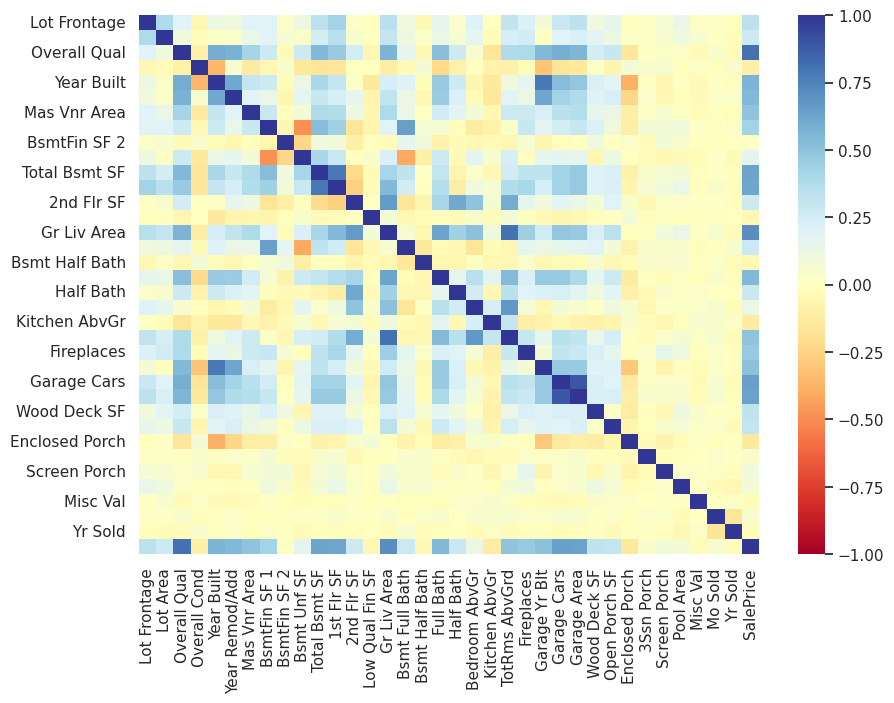

In [240]:
corr_heatmap(houses_numerical)


<Axes: >

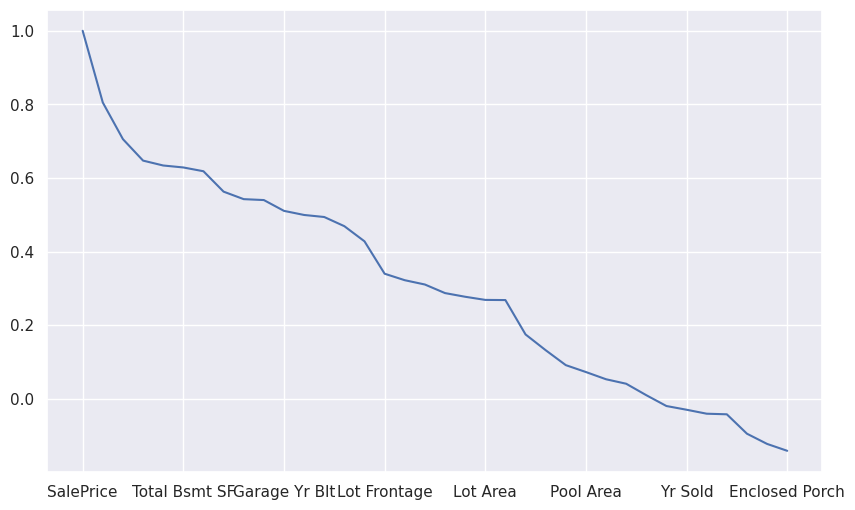

In [241]:
 plt.figure(figsize = (10,6))
 sns.set()
 houses_numerical.corr()['SalePrice'].sort_values(ascending = False).plot()


<Axes: >

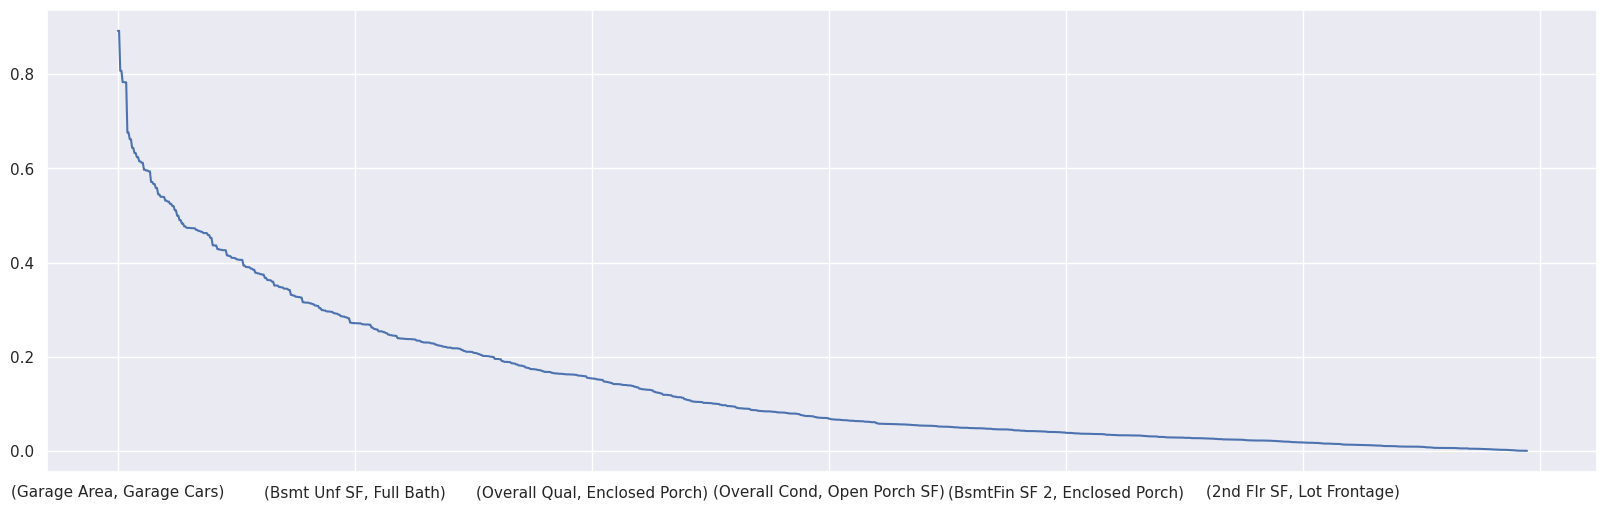

In [242]:
# plot pair correlations among the features
corr_unstacked = houses_numerical.corr().unstack()
corr_unstacked_not_self = corr_unstacked[ corr_unstacked != 1 ]
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
plt.figure(figsize = (20,6))
corr_pair[[
    'SalePrice' not in i
      for i in corr_pair.index
]].plot()


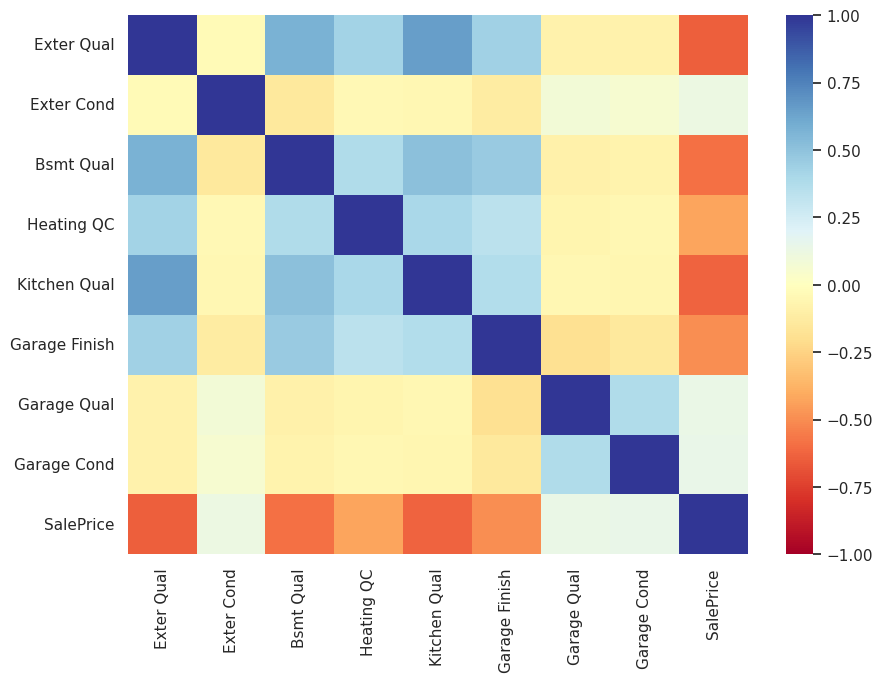

In [243]:
corr_heatmap(houses_ordinal)


<Axes: >

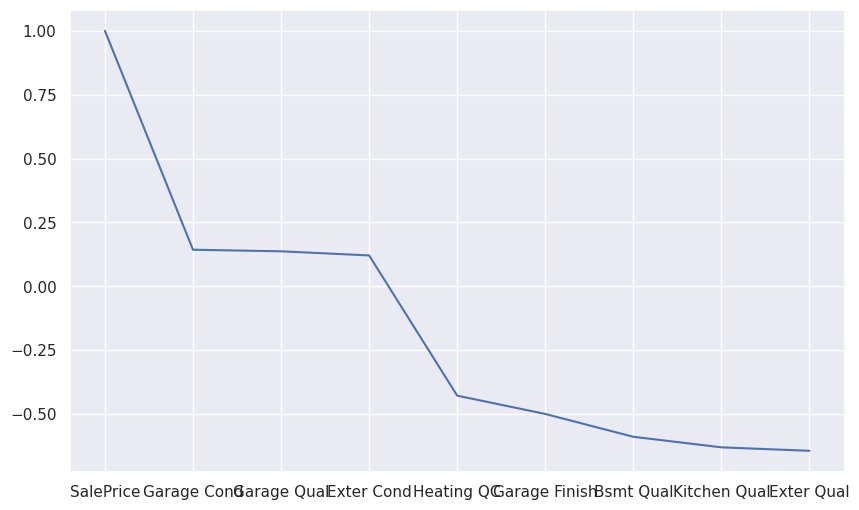

In [244]:
 plt.figure(figsize = (10,6))
 sns.set()
houses_ordinal.corr()['SalePrice'].sort_values(ascending = False).plot()


## Processing



### First, we will fit a model with just the numerical  features.

In [245]:
def perform_cv(data,
               n=200,
               test_size=0.25,
               target='SalePrice'):
  # Perform CV
  # split into Target and Features
  X = data.drop(target, axis = 1)
  y = data[target]
  results = {
      'rmse': np.zeros(n),
      'rmspe': np.zeros(n),
      'mae': np.zeros(n),
      'model': []
  }

  for idx in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    model = LinearRegression() # todo: Ridge
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['rmse'][idx] = np.sqrt(mean_squared_error(y_test,y_pred))
    results['rmspe'][idx] = (((y_test - y_pred) / y_test) **2).mean()**(1/2) * 100
    results['mae'][idx] = metrics.mean_absolute_error(y_test, y_pred)
    results['model'].append(model)

  print(f"CV RMSE: {results['rmse'].mean().round(2)}")
  print(f"CV RMSPE: {results['rmspe'].mean().round(2)}")
  print(f"CV MAE: {results['mae'].mean().round(2)}")
  print(f"Number of Predictors: {len(X.columns)}")

  # See how well our model performs on our test data
  plt.figure(figsize = (10,6))
  plt.scatter(y_test, y_pred)
  plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
  plt.xlabel(f'Actual {target}')
  plt.ylabel(f'Predicted {target}')

  # QQ Plot - Residuals are normally distributed
  res = y_test - y_pred
  plt.figure(figsize = (10,6))
  sm.qqplot(res, fit=True, line="45")

  # Residuals vs Fitted (Predicted) Values - Constant variance
  plt.figure(figsize = (10,6))
  plt.scatter(y_pred, res)
  plt.xlabel("Fitted")
  plt.ylabel("Residuals")
  plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed')

  # Residuals vs Time - indepedence
  plt.figure(figsize = (10,6))
  plt.scatter(range(len(res)), res)
  plt.plot(range(len(res)), res, 'b')
  plt.xlabel("Time")
  plt.ylabel("Residuals")
  plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed')

  return results

CV RMSE: 33131.59
CV RMSPE: 20.21
CV MAE: 20584.95
Number of Predictors: 35


,0
count,200.000000
mean,20.212492
std,3.708687
min,15.196190
25%,17.272653
50%,18.958653
75%,21.841009
max,29.985362


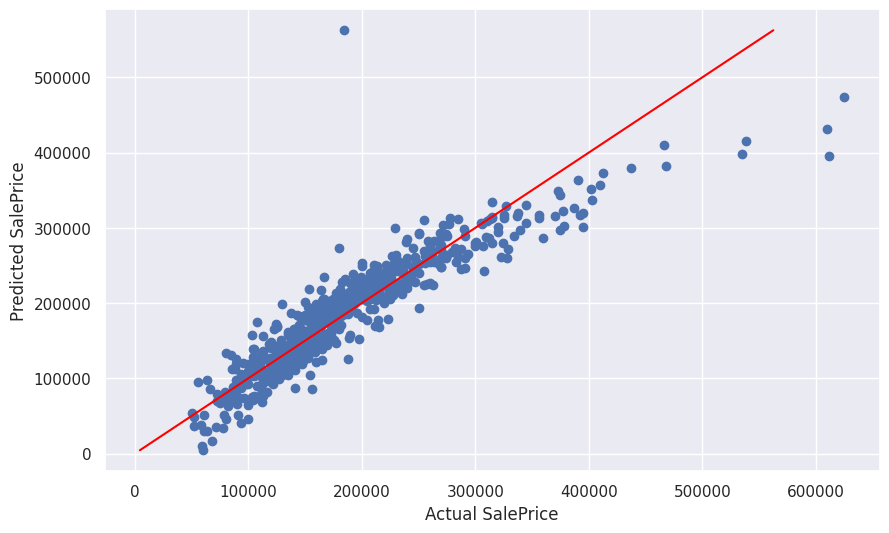

<Figure size 1000x600 with 0 Axes>

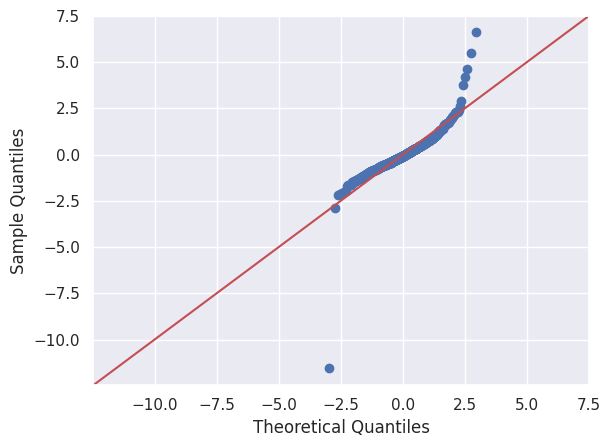

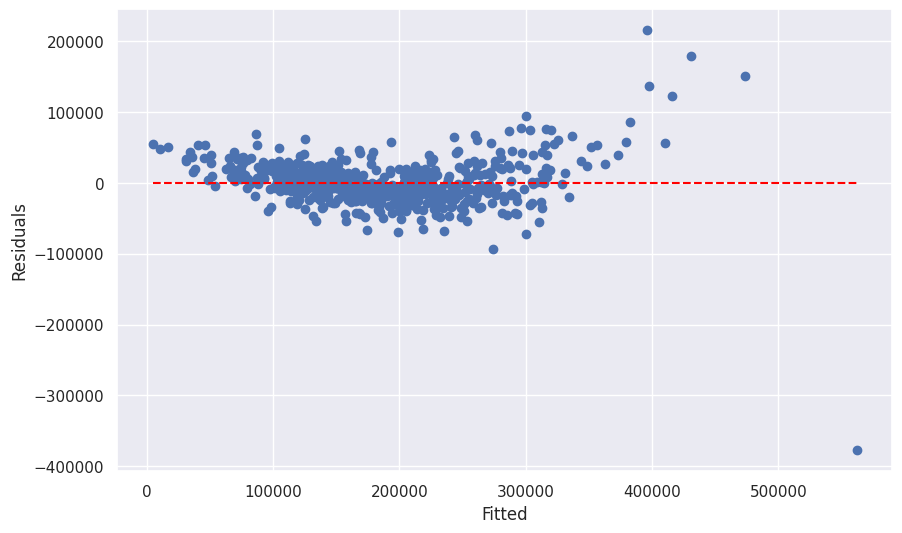

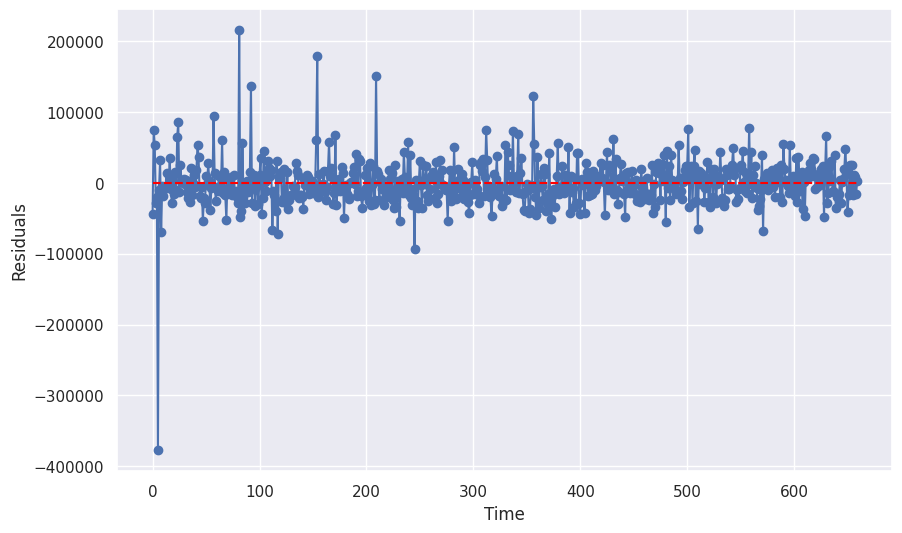

In [246]:
results = perform_cv(houses_numerical,) # n=200)
pd.Series(results['rmspe']).describe()


<Axes: >

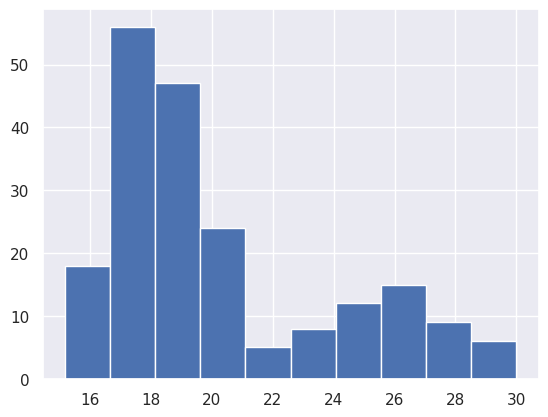

In [247]:
pd.Series(results['rmspe']).hist()


<Axes: >

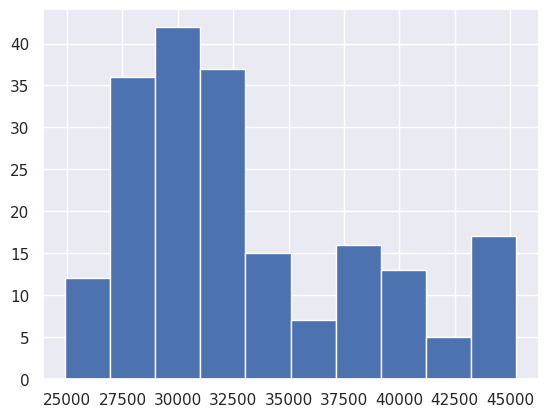

In [248]:
pd.Series(results['rmse']).hist()

### Add ordinals

In [249]:
houses_numerical.shape

(2637, 36)

In [250]:
houses_ordinal.shape


(2637, 9)

CV RMSE: 30331.5
CV RMSPE: 20.61
CV MAE: 18927.87
Number of Predictors: 43


,0
count,200.000000
mean,20.611650
std,4.993531
min,14.018213
25%,15.977769
50%,18.658816
75%,25.198901
max,33.761995


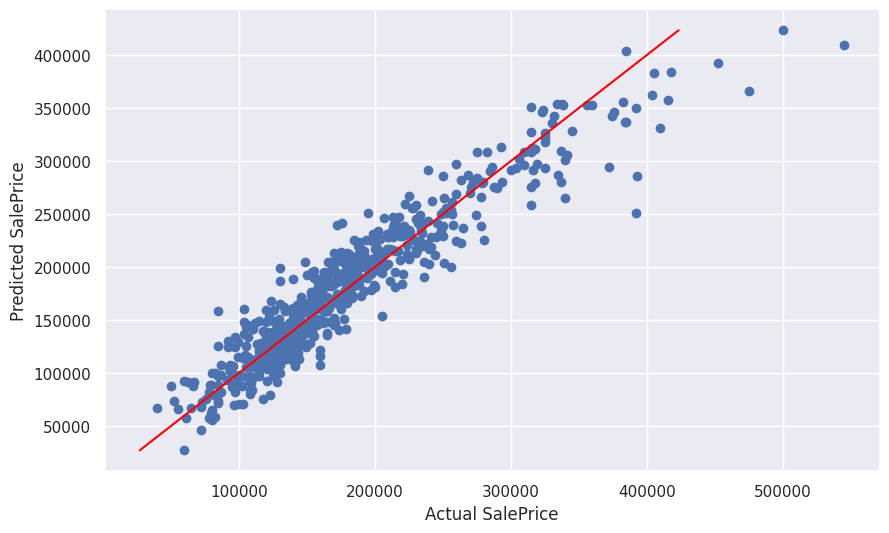

<Figure size 1000x600 with 0 Axes>

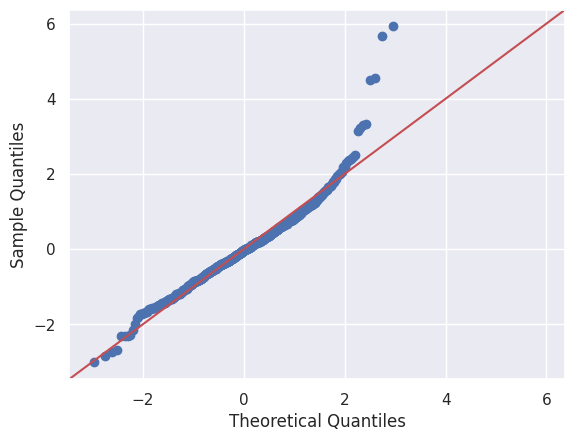

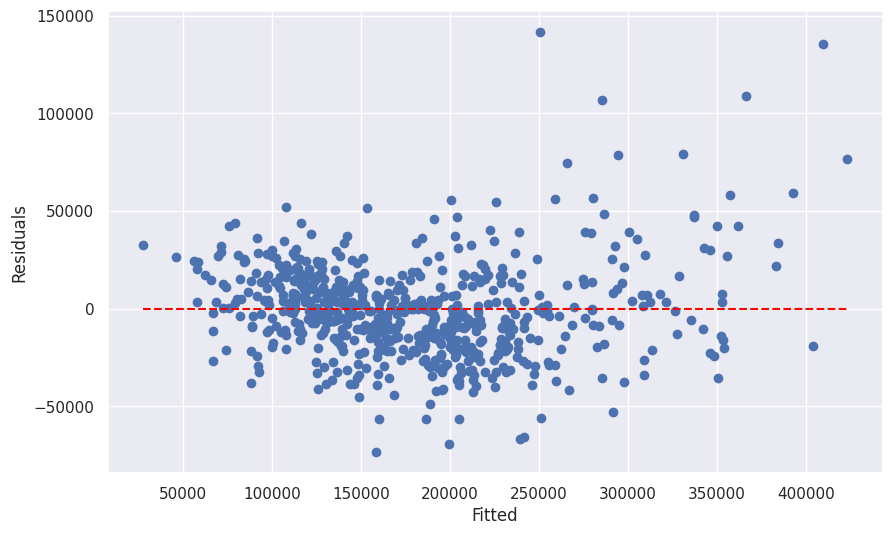

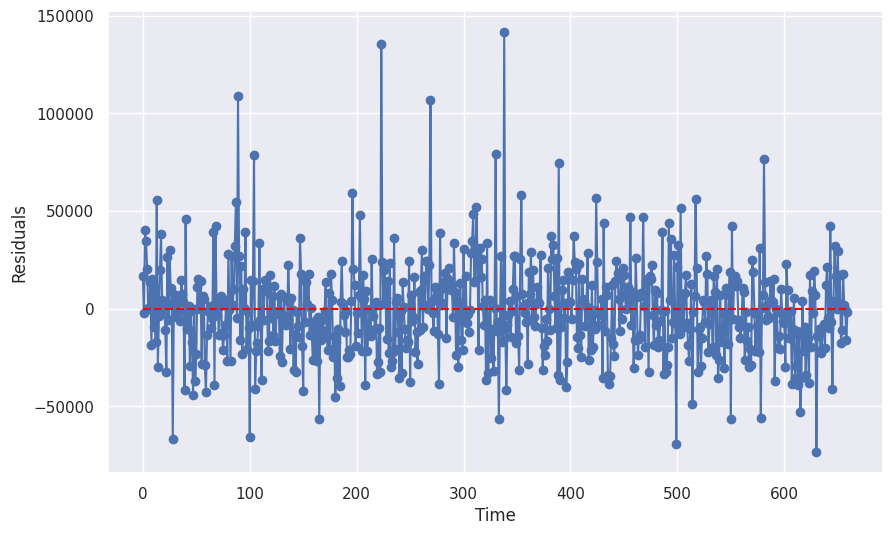

In [251]:
houses_ordinal.drop("SalePrice", axis=1, inplace=True)
houses_num_ord = pd.concat([houses_numerical, houses_ordinal], axis=1)
results = perform_cv(houses_num_ord,) # n=200)
pd.Series(results['rmspe']).describe()

## Features Selection

### Sort correlations w/ price

In [252]:
# Sort correlations w/ price
data = houses_numerical.copy()
data.corr()['SalePrice'].abs().sort_values(ascending = False)


,SalePrice
SalePrice,1.000000
Overall Qual,0.805016
Gr Liv Area,0.705482
Garage Cars,0.647151
Garage Area,0.633877
Total Bsmt SF,0.628533
1st Flr SF,0.618247
Year Built,0.562777
Full Bath,0.542386
Year Remod/Add,0.539932


### Filter features by corr threshold

In [253]:
corrs = data.corr()['SalePrice'].abs().sort_values(ascending = False)
keep = corrs[(corrs>.5) & (corrs <=1)]
keep

,SalePrice
SalePrice,1.000000
Overall Qual,0.805016
Gr Liv Area,0.705482
Garage Cars,0.647151
Garage Area,0.633877
Total Bsmt SF,0.628533
1st Flr SF,0.618247
Year Built,0.562777
Full Bath,0.542386
Year Remod/Add,0.539932


In [254]:
data_corr = data[keep.index].copy()
data_corr['SalePrice'] = data['SalePrice'].copy()
data_corr.head()

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Garage Yr Blt
0,115400,4,1005,2.0,440.0,1005.0,1005,1964,1,1964,1964.0
1,90000,4,1296,2.0,516.0,0.0,1296,1967,2,1967,1967.0
2,141000,6,1375,1.0,544.0,780.0,780,1937,1,1950,1979.0
3,254000,8,1848,2.0,592.0,975.0,975,2000,2,2000,2000.0
4,155000,7,1135,2.0,576.0,560.0,575,1936,1,2007,1971.0


CV RMSE: 34923.44
CV RMSPE: 22.41
CV MAE: 23112.98
Number of Predictors: 10


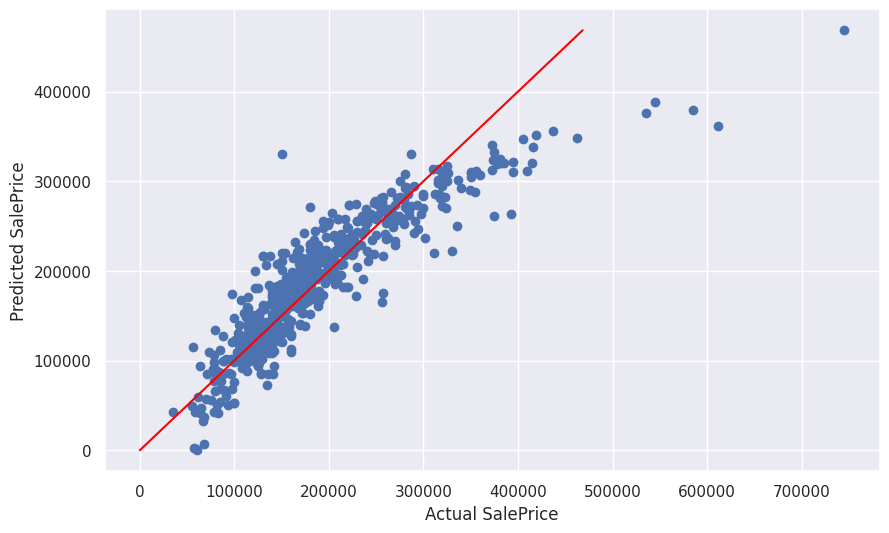

<Figure size 1000x600 with 0 Axes>

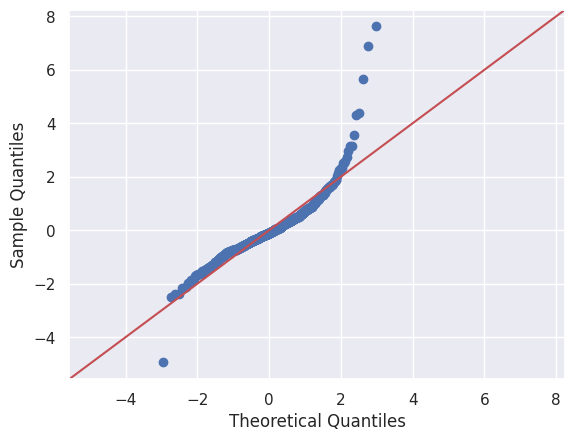

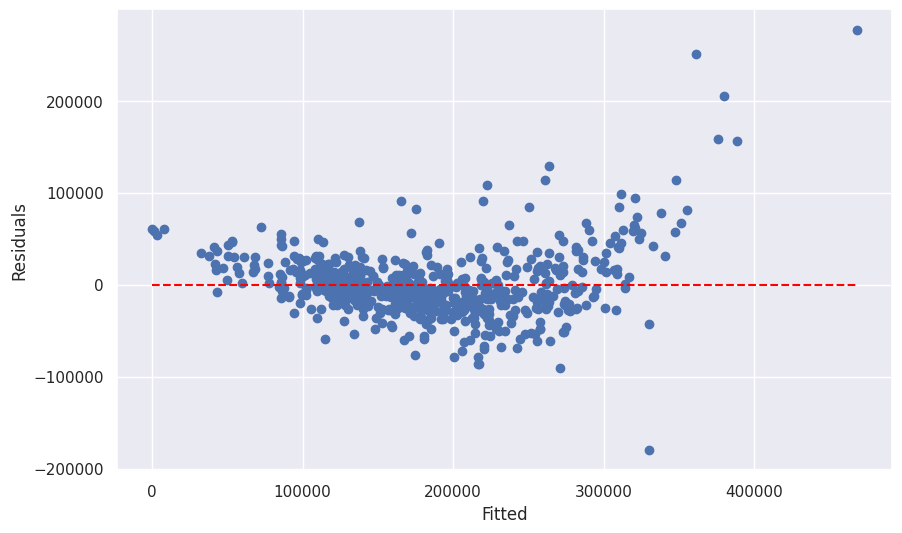

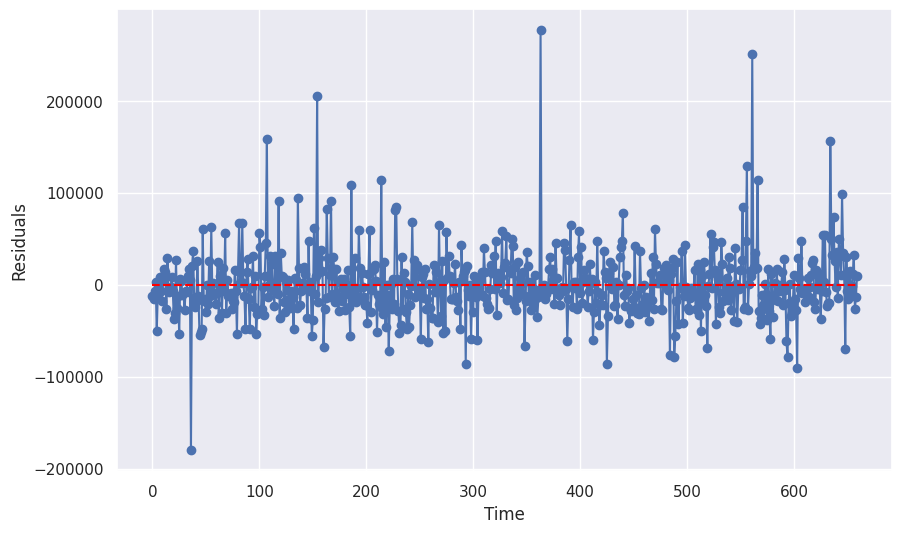

In [255]:
results_corr = perform_cv(data[keep.index],) # n=200


<Axes: >

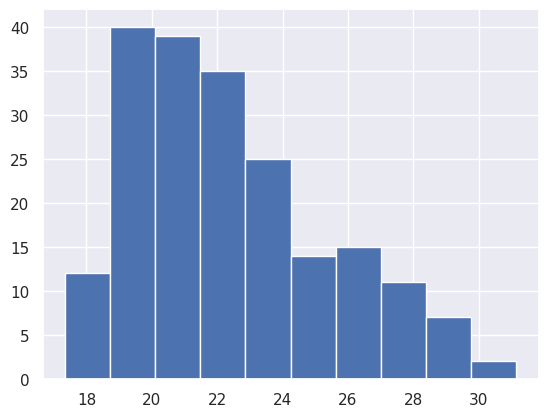

In [256]:
pd.Series(results_corr['rmspe']).hist()


<Axes: >

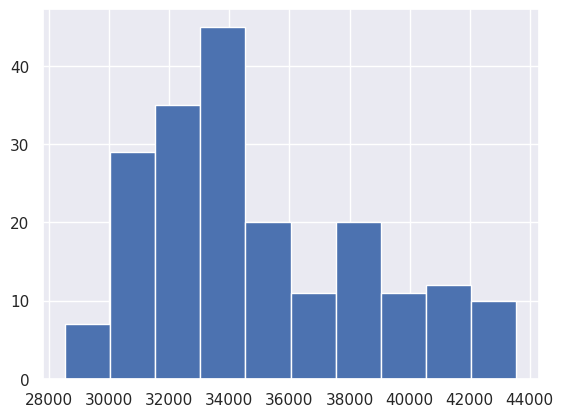

In [257]:
pd.Series(results_corr['rmse']).hist()


### Features By Lasso

In [258]:
def perform_cv_lasso(data,
                     target='SalePrice',
                     test_size=0.25,
                     alph = [50, 75, 100, 200, 300, ],
                     n = 200
                     ):
  X_lasso = data.drop(target, axis = 1)
  y_lasso = data[target]

  # Specify values of alpha we want to try
  #alph = [50, 75, 100, 200, 300, ]

  # Create empty list to hold results
  rmse_alpha = []
  rmspe_alpha = []
  models = []

  for i in alph:
    # Calculate CV RMSE
    rmse = np.zeros(n)
    rmspe = np.zeros(n)
    #my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10_000) # Looping through alpha
    alpha_lassos = []

    for idx in range(n):
      # Create the model
      my_fit_lasso = Lasso(alpha = i, tol = .01, max_iter=10_000) # Looping through alpha

      # Train, test split
      X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=test_size)

      # Standard scale only training features
      # default is z-score
      # todo: other scalings, eg minmax etc
      scaler = StandardScaler()
      scaler.fit(X_train)
      X_train = scaler.transform(X_train)

      # Scale testing features
      X_test = scaler.transform(X_test)

      # Fit regression
      my_fit_lasso.fit(X_train, y_train)

      # Predict
      y_pred = my_fit_lasso.predict(X_test)

      # Calculate and record performance metric
      rmse[idx] = np.sqrt(mean_squared_error(y_test,y_pred))
      rmspe[idx] = (((y_test - y_pred) / y_test) **2).mean()**(1/2) * 100
      alpha_lassos.append(my_fit_lasso)

    rmse_alpha.append(rmse.mean())
    rmspe_alpha.append(rmspe.mean())
    models.append(alpha_lassos[rmspe.argmin()])

  results_df = pd.DataFrame({
      'Alpha': alph,
      'RMSE': rmse_alpha,
      'RMSPE': rmspe_alpha,
  })
  return results_df, models


In [259]:
# %%capture --no-stdout
results_df, lassos = perform_cv_lasso(
    houses_numerical,
    alph = [0.1, 0.5, 1, 5, 10, 20, 50, 75, 100, 200, 300, ],
    n=200)
results_df.sort_values( by = 'RMSPE' )


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.814e+11, tolerance: 1.146e+11

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.561e+11, tolerance: 1.184e+11

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.278e+11, tolerance: 1.173e+11

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_des

,Alpha,RMSE,RMSPE
5,20.0,32540.105657,19.800962
10,300.0,32369.546846,19.886803
6,50.0,32672.861918,19.981058
0,0.1,32984.999624,20.068648
9,200.0,32829.648947,20.154900
7,75.0,32902.621640,20.173878
8,100.0,33101.298951,20.230628
3,5.0,33056.341983,20.315228
2,1.0,33087.941257,20.334573
1,0.5,33631.722735,20.772562


In [260]:
results_df['RMSPE'].argmin()


np.int64(5)

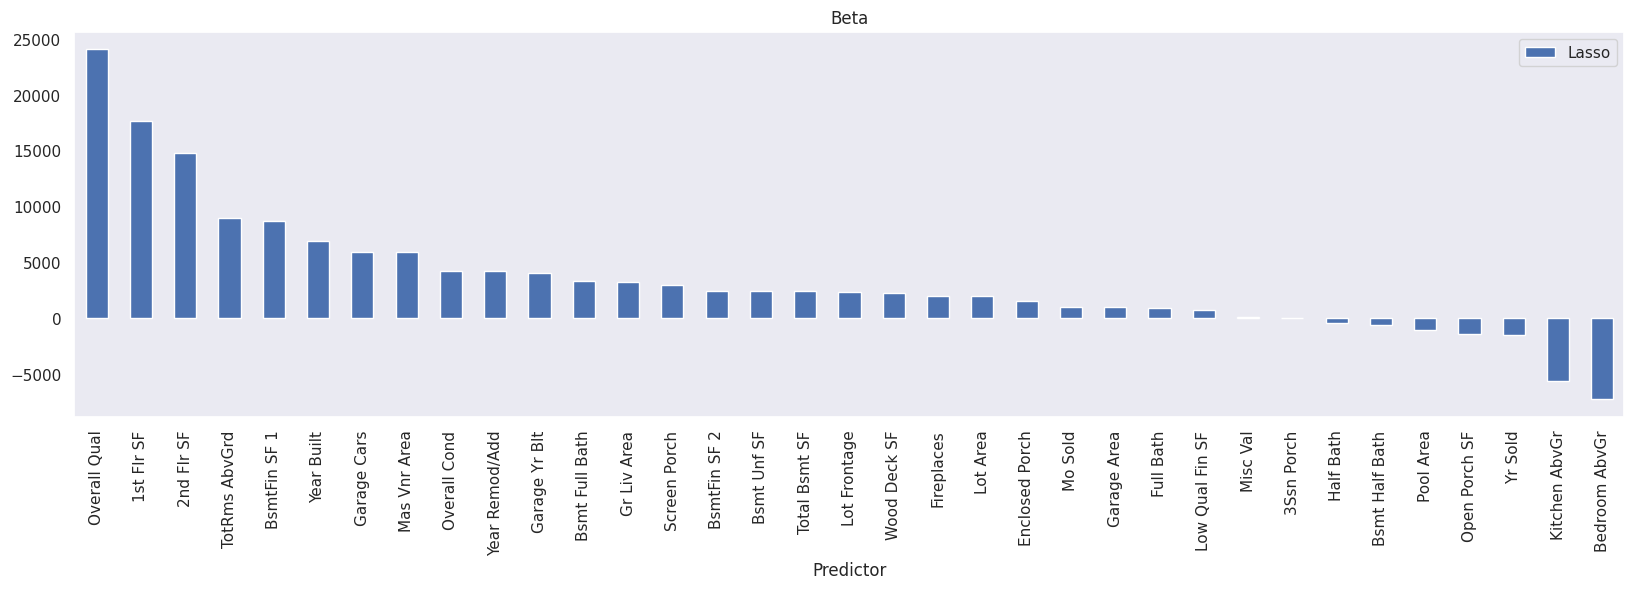

In [261]:
model = lassos[results_df['RMSPE'].argmin()]
#model = lassos[-1]
model_results = pd.DataFrame()
# model_results['Predictor'] = X_lasso.columns
model_results['Predictor'] = houses_numerical.columns[houses_numerical.columns != 'SalePrice']
model_results['Lasso'] = model.coef_
model_results.sort_values( by = ["Lasso"], ascending = False ).plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5),
    title='Beta'
    )
plt.grid()

In [262]:
model_results['Lasso'].abs().sort_values()


,Lasso
29,17.118697
32,143.888789
18,472.587347
16,647.846343
13,713.619781
17,895.660064
25,992.907881
33,1008.756858
31,1077.717409
27,1386.484118


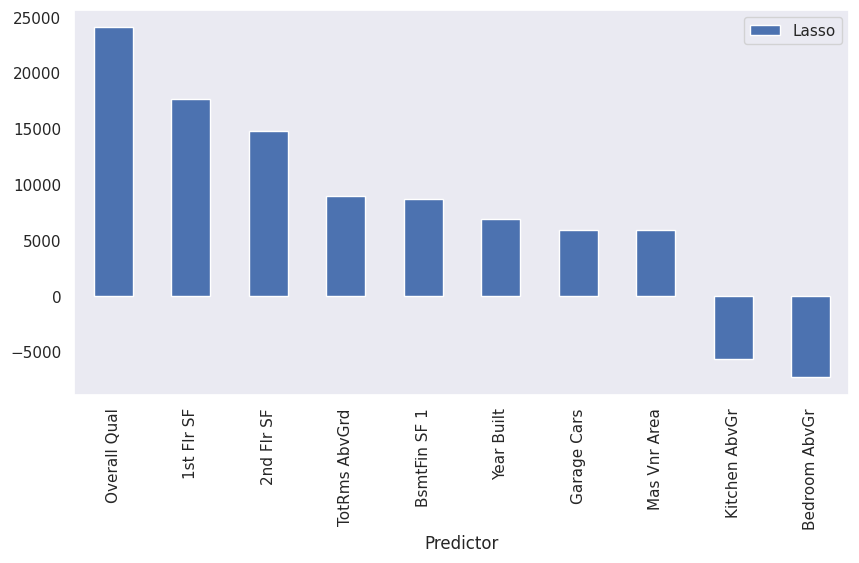

In [263]:
greater_5000= model_results[(model_results['Lasso'] > 5000 ) | (model_results['Lasso'] < -5000 )]
greater_5000.sort_values( by = ["Lasso"], ascending = False ).plot(x = 'Predictor', kind = 'bar', figsize = (10,5))
plt.grid()


## Data Visualization/Communication of Results


CV RMSE: 32960.75
CV RMSPE: 20.73
CV MAE: 21760.23
Number of Predictors: 10


,0
count,200.000000
mean,20.728059
std,2.681963
min,15.956294
25%,18.566556
50%,20.227455
75%,22.723265
max,27.824639


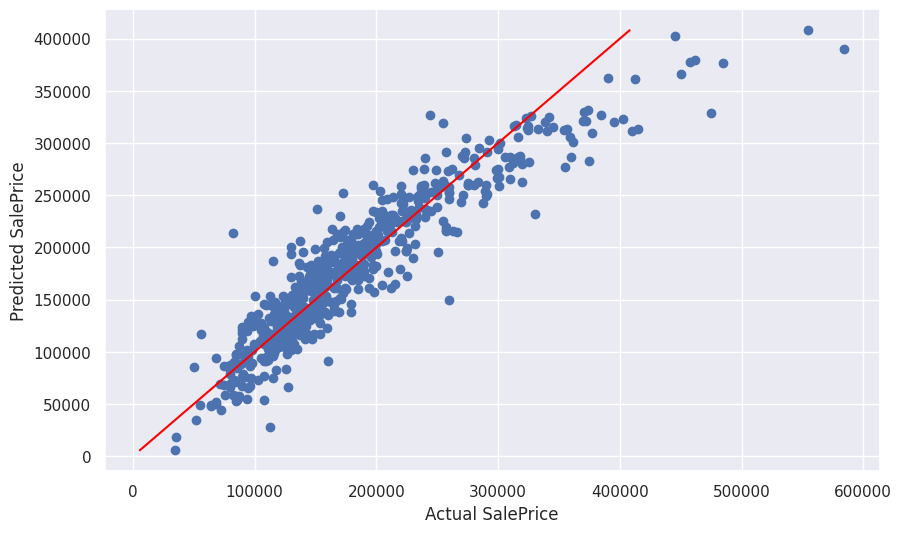

<Figure size 1000x600 with 0 Axes>

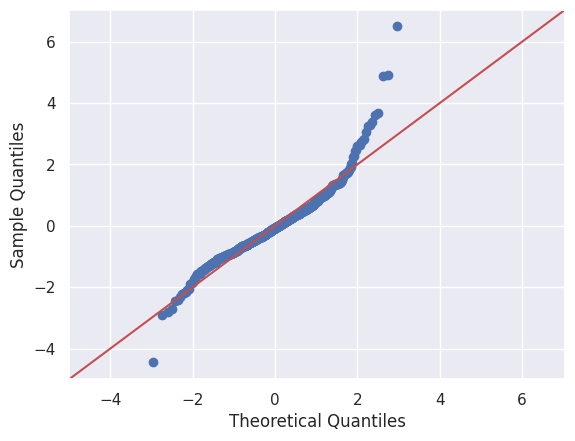

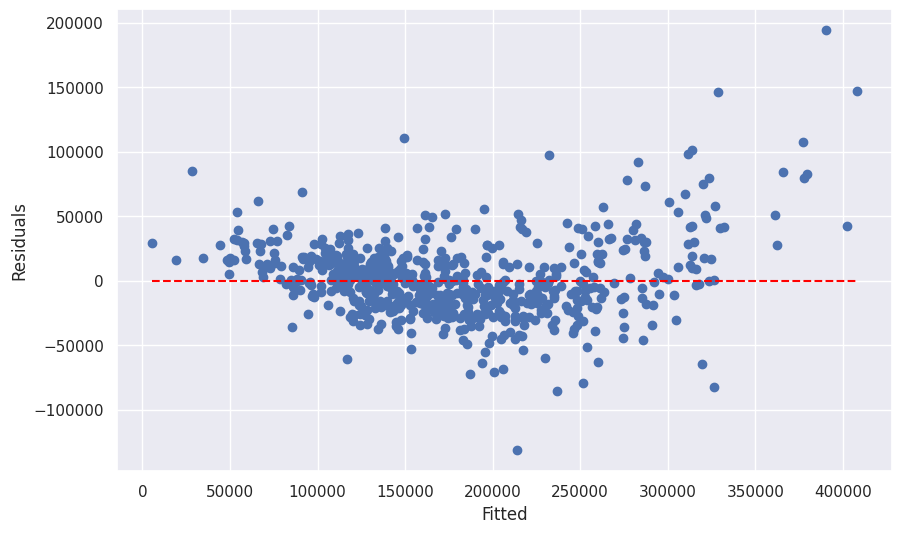

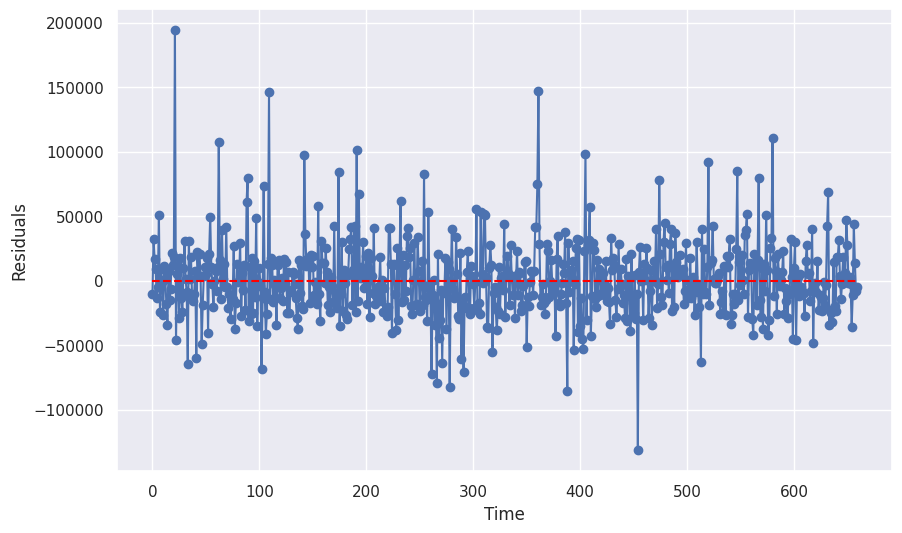

In [264]:
houses_numerical_L5000 = houses_numerical[greater_5000["Predictor"].tolist() + ['SalePrice']]
results_L5000 = perform_cv(houses_numerical_L5000,) # n=200)
pd.Series(results_L5000['rmspe']).describe()


In [265]:
greater_5000["Predictor"]


,Predictor
2,Overall Qual
4,Year Built
6,Mas Vnr Area
7,BsmtFin SF 1
11,1st Flr SF
12,2nd Flr SF
19,Bedroom AbvGr
20,Kitchen AbvGr
21,TotRms AbvGrd
24,Garage Cars


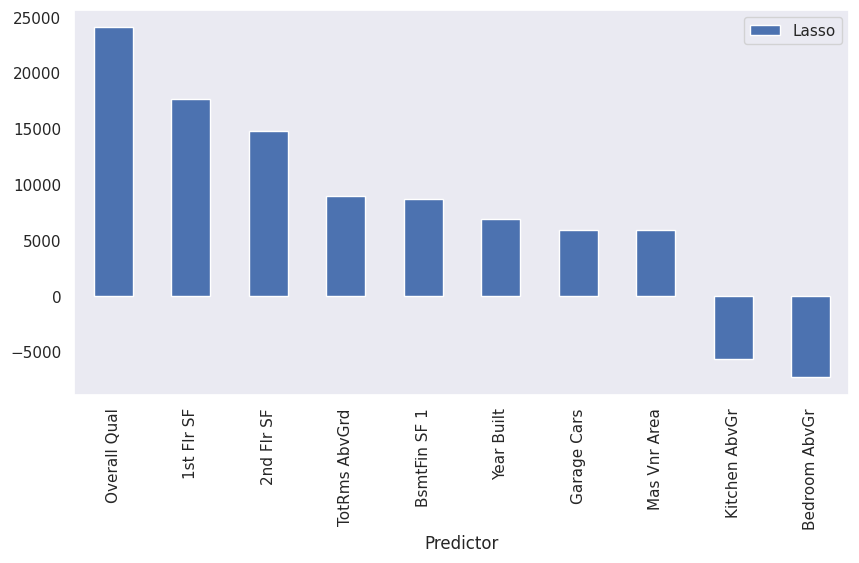

In [266]:
greater_5000.sort_values( by = ["Lasso"], ascending = False ).plot(x = 'Predictor', kind = 'bar', figsize = (10,5))
plt.grid()


### Add Ordinal


In [267]:
# %%capture --no-stdout
results_df_ord, lassos_ord = perform_cv_lasso(
    houses_num_ord,
    alph = [0.1, 0.5, 1, 5, 10, 20, 50, 75, 100, 200, 300, ],
    n=200)
results_df_ord.sort_values( by = 'RMSPE' )

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.304e+11, tolerance: 1.202e+11

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.190e+11, tolerance: 1.221e+11

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.404e+11, tolerance: 1.231e+11

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_des

,Alpha,RMSE,RMSPE
6,50.0,30449.029844,20.363873
4,10.0,30440.186258,20.579710
8,100.0,30184.620588,20.617484
10,300.0,31042.648229,20.694583
3,5.0,30763.846780,20.725820
9,200.0,30976.791692,20.744200
7,75.0,30923.159835,20.761785
5,20.0,30648.221598,20.781026
2,1.0,31263.052370,20.794821
1,0.5,30752.371603,21.205411


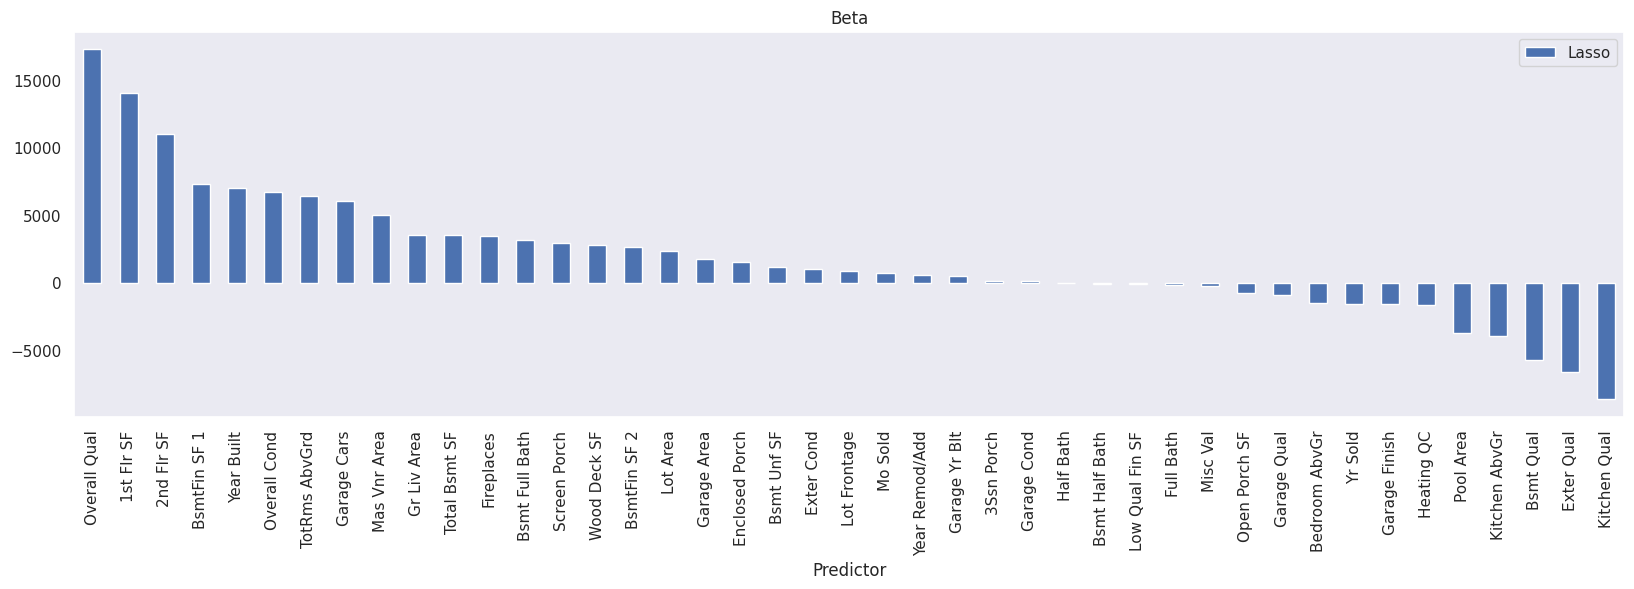

In [268]:
model_ord = lassos_ord[results_df_ord['RMSPE'].argmin()]
#model = lassos_ord[-1]
model_results_ord = pd.DataFrame()
# model_results['Predictor'] = X_lasso.columns
model_results_ord['Predictor'] = houses_num_ord.columns[houses_num_ord.columns != 'SalePrice']
model_results_ord['Lasso'] = model_ord.coef_
model_results_ord.sort_values( by = ["Lasso"], ascending = False ).plot(
    x = 'Predictor',
    kind = 'bar',
    figsize = (20,5),
    title='Beta'
    )
plt.grid()

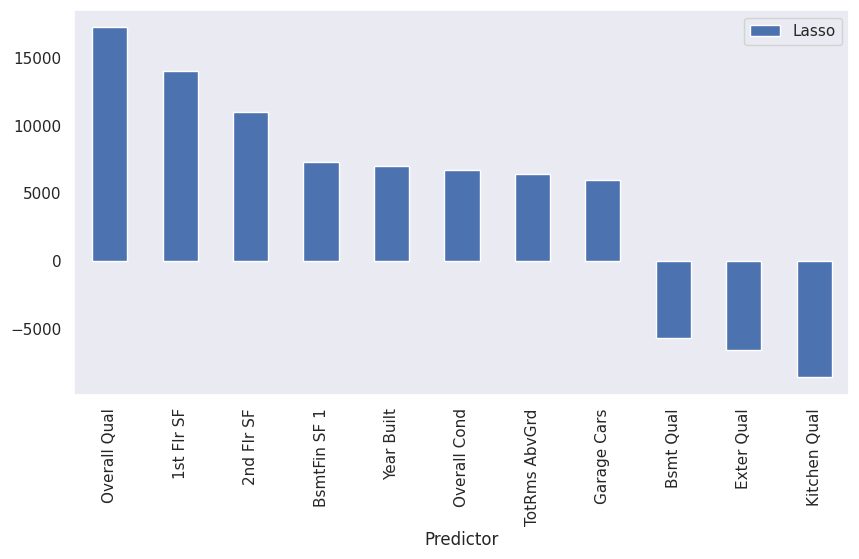

In [269]:
greater_5000= model_results_ord[(model_results_ord['Lasso'] > 5000 ) | (model_results_ord['Lasso'] < -5000 )]
greater_5000.sort_values( by = ["Lasso"], ascending = False ).plot(x = 'Predictor', kind = 'bar', figsize = (10,5))
plt.grid()



CV RMSE: 31262.8
CV RMSPE: 21.28
CV MAE: 20259.36
Number of Predictors: 11


,0
count,200.000000
mean,21.281960
std,4.236915
min,15.147734
25%,17.789515
50%,19.739831
75%,24.957359
max,31.697264


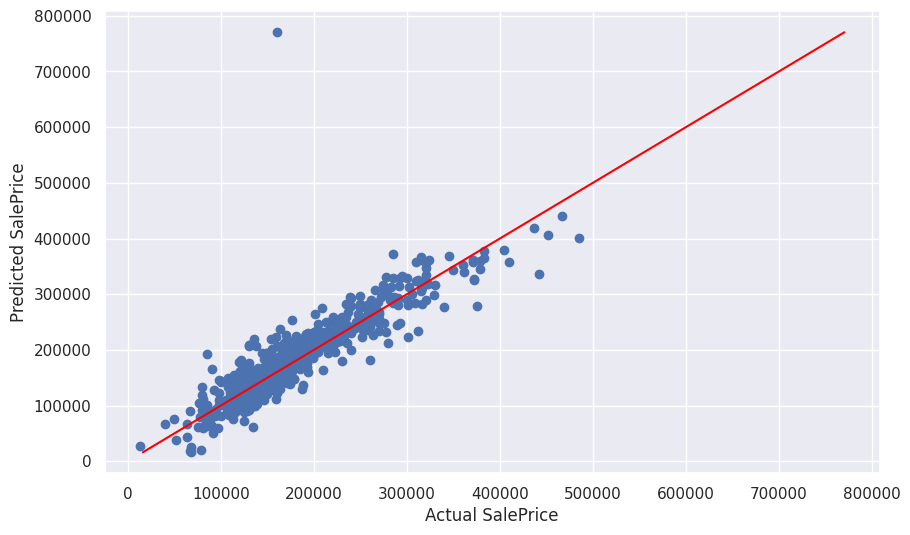

<Figure size 1000x600 with 0 Axes>

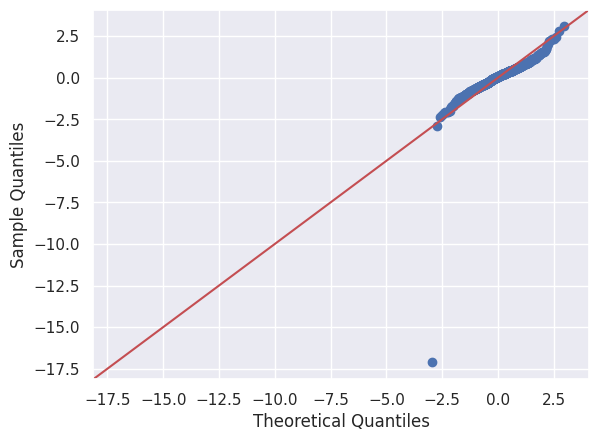

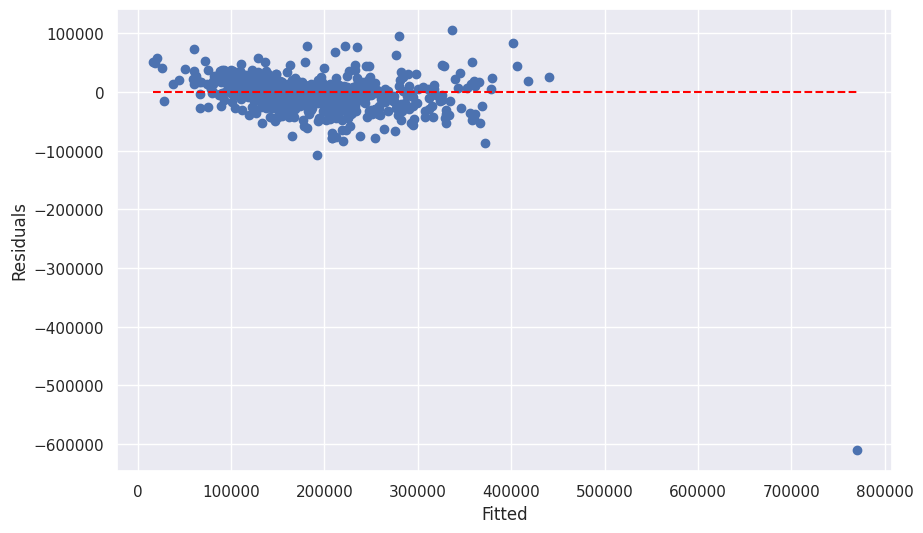

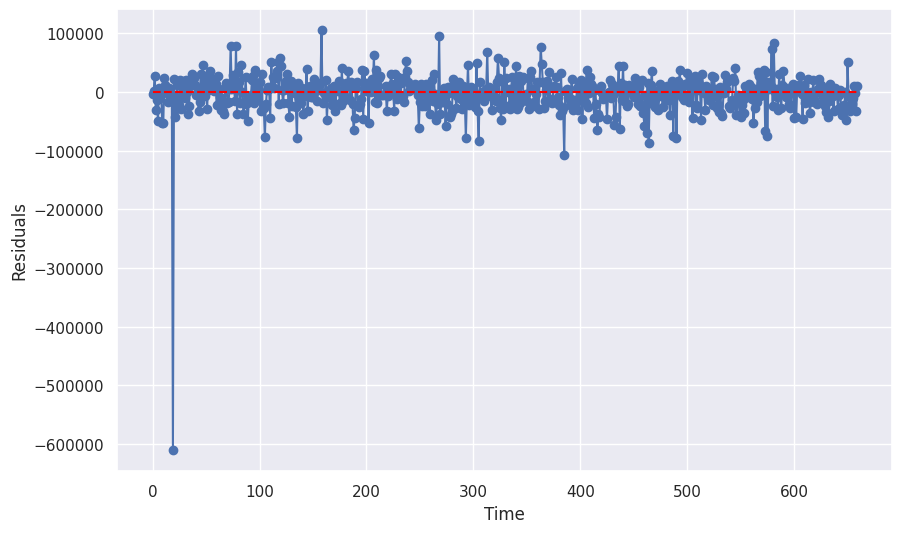

In [270]:
houses_num_ord_L5000 = houses_num_ord[greater_5000["Predictor"].tolist() + ['SalePrice']]
results_num_ord_L5000 = perform_cv(houses_num_ord_L5000,) # n=500)
pd.Series(results_num_ord_L5000['rmspe']).describe()


In [271]:
pd.Series(results_num_ord_L5000['rmspe']).describe()


,0
count,200.000000
mean,21.281960
std,4.236915
min,15.147734
25%,17.789515
50%,19.739831
75%,24.957359
max,31.697264


## Follow ups

- Add the nominal features
- Transform/normalize data distributions
- Alternative regressions, eg Rigdge
- Alternative scaling, eg Robust, Minmax
